In [58]:
# Convert 'Domestic' & 'Foreign' columns to float, nan values cannot be converted to integer.

# 'Domestic' column
worldwide_200['Domestic'] = worldwide_200['Domestic'].str.replace(',', '')
worldwide_200['Domestic'] = worldwide_200['Domestic'].str.replace('$', '')

domestic_list = worldwide_200['Domestic'].values.tolist()

new_list = []
for i in range(len(domestic_list)):
    if domestic_list[i] == '-':
        new_list.append(np.nan)
    else:
        new_list.append(int(domestic_list[i]))

worldwide_200['Domestic'] = new_list

worldwide_200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           200 non-null    int64  
 1   Release Group  200 non-null    object 
 2   Worldwide      200 non-null    int64  
 3   Domestic       122 non-null    float64
 4   %              200 non-null    object 
 5   Foreign        200 non-null    object 
 6   %.1            200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


C:\Users\sylhu\AppData\Local\Temp\ipykernel_12280\3133726622.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  worldwide_200['Domestic'] = worldwide_200['Domestic'].str.replace('$', '')


In [59]:
# 'Foreign' column
worldwide_200['Foreign'] = worldwide_200['Foreign'].str.replace(',', '')
worldwide_200['Foreign'] = worldwide_200['Foreign'].str.replace('$', '')

foreign_list = worldwide_200['Foreign'].values.tolist()

new_list = []
for i in range(len(foreign_list)):
    if foreign_list[i] == '-':
        new_list.append(np.nan)
    else:
        new_list.append(int(foreign_list[i]))

worldwide_200['Foreign'] = new_list

worldwide_200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           200 non-null    int64  
 1   Release Group  200 non-null    object 
 2   Worldwide      200 non-null    int64  
 3   Domestic       122 non-null    float64
 4   %              200 non-null    object 
 5   Foreign        194 non-null    float64
 6   %.1            200 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 11.1+ KB


C:\Users\sylhu\AppData\Local\Temp\ipykernel_12280\3921778924.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  worldwide_200['Foreign'] = worldwide_200['Foreign'].str.replace('$', '')


In [60]:
# Convert '%' and '%.1' columns to float.

worldwide_200['%'] = pd.to_numeric(worldwide_200['%'].str.replace('%', ''), errors='coerce') / 100
worldwide_200['%.1'] = pd.to_numeric(worldwide_200['%.1'].str.replace('%', ''), errors='coerce') / 100

worldwide_200[['%', '%.1']].head()

,%,%.1
0,0.441,0.559
1,0.422,0.578
2,0.343,0.657
3,0.425,0.575
4,0.207,0.793


In [61]:
worldwide_200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           200 non-null    int64  
 1   Release Group  200 non-null    object 
 2   Worldwide      200 non-null    int64  
 3   Domestic       122 non-null    float64
 4   %              122 non-null    float64
 5   Foreign        194 non-null    float64
 6   %.1            194 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 11.1+ KB


In [66]:
# Rename '%' and '%.1' columns

worldwide_200.rename(columns={'%': '% of Total', '%.1': '% of Total'}, inplace=True)

worldwide_200.head()

,Rank,Release Group,Worldwide,Domestic,% of Total,Foreign,% of Total
0,1,Barbie,1441820453,636220453.0,0.441,805600000.0,0.559
1,2,The Super Mario Bros. Movie,1361365341,574934330.0,0.422,786431011.0,0.578
2,3,Oppenheimer,952010450,326076450.0,0.343,625934000.0,0.657
3,4,Guardians of the Galaxy Vol. 3,845555777,358995815.0,0.425,486559962.0,0.575
4,5,Fast X,704875015,146126015.0,0.207,558749000.0,0.793


In [67]:
# Export DataFrame to a CSV file
worldwide_200.to_csv('2023_worldwide_box_office_data.csv', index=False)

Graphs

In [21]:
# Dependencies and Setup
import pandas as pd 
from pathlib import Path
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import CSV file using Pandas
worldwide_df = pd.read_csv('2023_worldwide_box_office_data.csv')
worldwide_df.head()

,Rank,Release Group,Worldwide,Domestic,% of Total,Foreign,% of Total.1
0,1,Barbie,1441820453,636220453.0,0.441,805600000.0,0.559
1,2,The Super Mario Bros. Movie,1361365341,574934330.0,0.422,786431011.0,0.578
2,3,Oppenheimer,952010450,326076450.0,0.343,625934000.0,0.657
3,4,Guardians of the Galaxy Vol. 3,845555777,358995815.0,0.425,486559962.0,0.575
4,5,Fast X,704875015,146126015.0,0.207,558749000.0,0.793


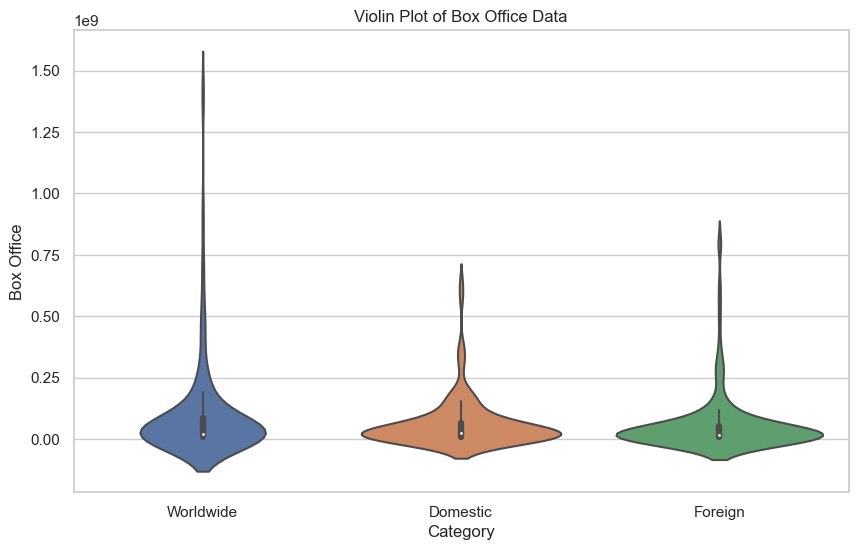

In [17]:
# Melt the wide-form dataset into long-form
melted_df = pd.melt(worldwide_df, id_vars=['Rank'], value_vars=['Worldwide', 'Domestic', 'Foreign'],
                    var_name='Category', value_name='Box Office')

# Create a violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(x='Category', y='Box Office', data=melted_df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Box Office')
plt.title('Violin Plot of Box Office Data')

# Show the plot
plt.show()

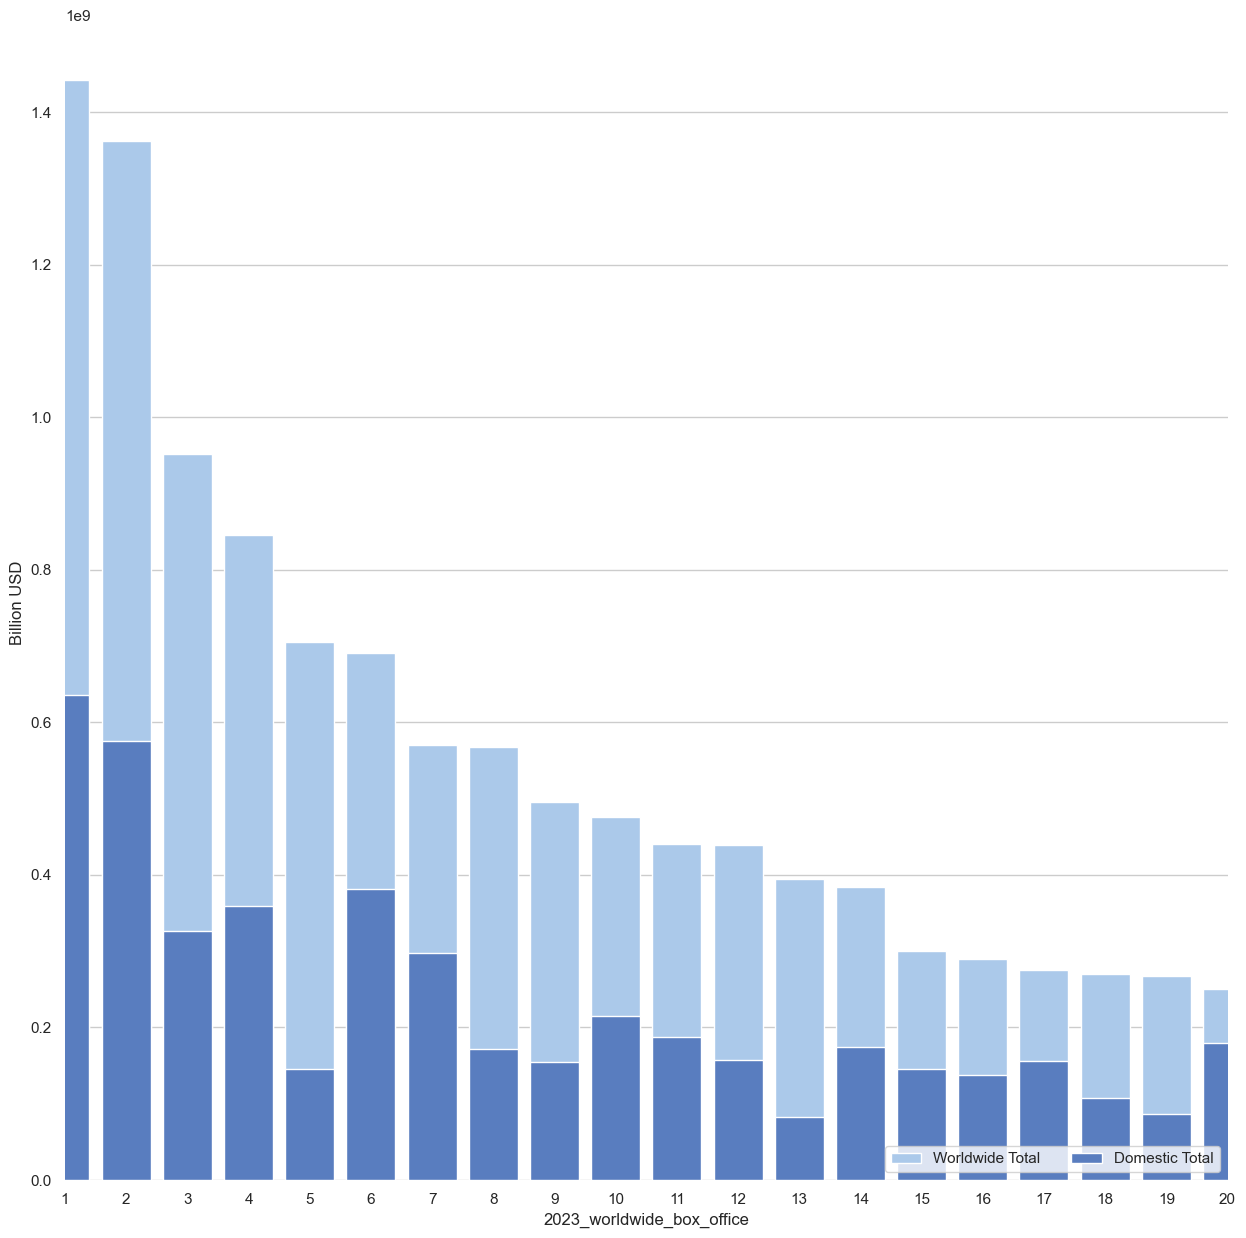

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Rank", y="Worldwide", data=worldwide_df,
            label="Worldwide Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Rank", y="Domestic", data=worldwide_df,
            label="Domestic Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,19), ylabel="Billion USD",
       xlabel="2023_worldwide_box_office")
sns.despine(left=True, bottom=True)